<a href="https://colab.research.google.com/github/Skommireddy/Projects-IDS/blob/main/HW4/problem2_r_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: *Identifying the data source, collecting the data from GitHub, analyzing the data set in R by creating contingency tables, plotting the graphs, determining the outliers and Standardize (zero mean) the variables.*

In [43]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


The import pandas is used to bring the pandas data analysis library into the current environment. The as pd is used to give pandas the alias of pd. This allows you to use pandas functions by simply typing pd.

In [44]:
import pandas as pd

Importing csv file from Github repositiory HW4 folder.
Printing the imported data set nutrition_subsetDF.

In [45]:
# Let's read in the data file
%%R
# used to read csv files
library(readr)
nutrition_subsetDF <- read_csv("https://raw.githubusercontent.com/Skommireddy/Projects-IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)
nutrition_subsetDF

# A tibble: 961 × 4
   `food item`                         weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 GELATIN; DRY                  1 EN…             7             0             0
 2 SEAWEED; SPIRULINA; DRIED     1 OZ             28.4           0.8           0
 3 YEAST; BAKERS; DRY; ACTIVE    1 PKG             7             0             0
 4 PARMESAN CHEESE; GRATED       1 OZ             28.4           5.4          22
 5 PARMESAN CHEESE; GRATED       1 CUP           100            19.1          79
 6 PARMESAN CHEESE; GRATED       1 TB…             5             1             4
 7 YEAST; BREWERS; DRY           1 TB…             8             0             0
 8 LAMB;CHOPS;ARM;BRAISED;LEAN   1.7 …            48             2.9          59
 9 TUNA; CANND; DRND;WATR; WHITE 3 OZ             85             0.3          48
10 NONFAT DRY MILK; INSTANTIZED  1 CUP            68             0.3          12
# … with

Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.

*   CHEESECAKE 1 CAKE	of weight 1110.0 grams and ICE CREAM; VANLLA; RICH 16% FT1/2 GAL	of weight 1188.0 grams almost has the same saturated_fat of 119.9 and 118.3 where as cholesterol has more difference with 2053 and 703.

*   ICE CREAM; VANLLA; RICH 16% FT1/2 GAL	of weight 1188.0 grams and YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE	of weight 1108.0 grams has the  saturated_fat of 118.3 and 92.0 with cholesterol 703 and 609.

* YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE of weight 1188.0 grams and  CREME PIE 1 PIE 	of weight 910.0 grams has almost the same  saturated_fat of 92.0 and 90.1 with more difference in cholesterol values with 609 and 46.

* CREME PIE 1 PIE of weight 910.0 grams and  LARD 1 CUP of weight 205.0 grams has slight difference in saturated_fat with 90.1 and 80.4 and more difference in cholesterol values with 46 and 195.

In [46]:
# Sort by the saturated_fat and display the first 5 rows

%%R

head(nutrition_subsetDF[order(nutrition_subsetDF$saturated_fat, decreasing=TRUE), 1:4])


# A tibble: 6 × 4
  `food item`                          weight_in_grams saturated_fat cholesterol
  <chr>                                          <dbl>         <dbl>       <dbl>
1 CHEESECAKE                    1 CAKE            1110         120.         2053
2 ICE CREAM; VANLLA; RICH 16% FT1/2 G…            1188         118.          703
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE            1108          92           609
4 CREME PIE                     1 PIE              910          90.1          46
5 LARD                          1 CUP              205          80.4         195
6 ICE CREAM; VANLLA; REGULR 11% 1/2 G…            1064          71.3         476


Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?

*   BUTTER; SALTED 1 TBSP
*   BUTTER; UNSALTED 1 TBSP both have the same saturated fat per gram 0.507143



In [47]:
# create a new variable saturated_ fat_ per_gram
%%R
nutrition_subsetDF['saturated_fat_per_gram'] <- nutrition_subsetDF$saturated_fat / nutrition_subsetDF$weight_in_grams 
head (nutrition_subsetDF)

# A tibble: 6 × 5
  `food item`         weight_in_grams saturated_fat cholesterol saturated_fat_p…
  <chr>                         <dbl>         <dbl>       <dbl>            <dbl>
1 GELATIN; DRY      …             7             0             0           0     
2 SEAWEED; SPIRULINA…            28.4           0.8           0           0.0282
3 YEAST; BAKERS; DRY…             7             0             0           0     
4 PARMESAN CHEESE; G…            28.4           5.4          22           0.190 
5 PARMESAN CHEESE; G…           100            19.1          79           0.191 
6 PARMESAN CHEESE; G…             5             1             4           0.2   


In [48]:
%%R
# Sorting thge saturated_fat_per_gram
head(nutrition_subsetDF[order(nutrition_subsetDF$saturated_fat_per_gram, decreasing=TRUE), 1:5])

# A tibble: 6 × 5
  `food item`         weight_in_grams saturated_fat cholesterol saturated_fat_p…
  <chr>                         <dbl>         <dbl>       <dbl>            <dbl>
1 BUTTER; SALTED    …              14           7.1          31            0.507
2 BUTTER; UNSALTED  …              14           7.1          31            0.507
3 BUTTER; SALTED    …             113          57.1         247            0.505
4 BUTTER; UNSALTED  …             113          57.1         247            0.505
5 BUTTER; SALTED    …               5           2.5          11            0.5  
6 BUTTER; UNSALTED  …               5           2.5          11            0.5  


Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram


*   There are 15 outliers for saturated fat per gram.
*   From the bar plot below all the values above 1.2 are outliers.





In [49]:
#Standardize (zero mean) the saturated_fat variable
%%R
nutrition_subsetDF$scaled_saturated_fat_per_gram <- scale(x = nutrition_subsetDF$saturated_fat_per_gram)
summary(nutrition_subsetDF$scaled_saturated_fat_per_gram)

       V1         
 Min.   :-0.5620  
 1st Qu.:-0.5620  
 Median :-0.4411  
 Mean   : 0.0000  
 3rd Qu.: 0.1539  
 Max.   : 7.1068  


In [50]:
# three sigma rule for saturated_fat_per_gram variable.
%%R
three_sigma_rule <- (nutrition_subsetDF$scaled_saturated_fat_per_gram < -3 | 
                     nutrition_subsetDF$scaled_saturated_fat_per_gram > 3 )
# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")
# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 
# The which() command returns the row indices of all such records. 
cat("The scaled saturated_fat_per_gram values that are outliers: \n\n")
nutrition_subsetDF$scaled_saturated_fat_per_gram[which(three_sigma_rule)]
cat("\n\nThe scaled saturated_fat_per_gram values that are NOT outliers: \n\n")
nutrition_subsetDF$scaled_saturated_fat_per_gram[which(!three_sigma_rule)]

There are 15 outliers 

The scaled saturated_fat_per_gram values that are outliers: 



The scaled saturated_fat_per_gram values that are NOT outliers: 

  [1] -0.562042578 -0.135330425 -0.562042578  2.318264454  2.326185298
  [6]  2.462279806 -0.562042578  0.351554809 -0.508672183 -0.495329584
 [11] -0.495573954 -0.020184817 -0.184002280  0.069905383 -0.038602165
 [16] -0.015984370  1.094133966 -0.191717388  2.064342650 -0.403793151
 [21]  0.761098465  0.389155591 -0.015984370  0.052272906  0.291883742
 [26] -0.312980734 -0.401931393 -0.178961743 -0.313616096  0.273031513
 [31] -0.348560998 -0.188449813 -0.312980734  0.451398785  0.451398785
 [36]  1.091467015  2.104908378  0.162090951  0.330380421  0.005017869
 [41]  0.654638841  0.817804510 -0.064893693 -0.321471479 -0.281212642
 [46] -0.117289286  0.576525849  0.309673874  0.843377824  0.167352821
 [51]  0.505365322  0.470398512  0.470398512 -0.006554793  0.286890021
 [56]  0.185142952  1.359291642  0.434204796 -0.259610339  0.5720

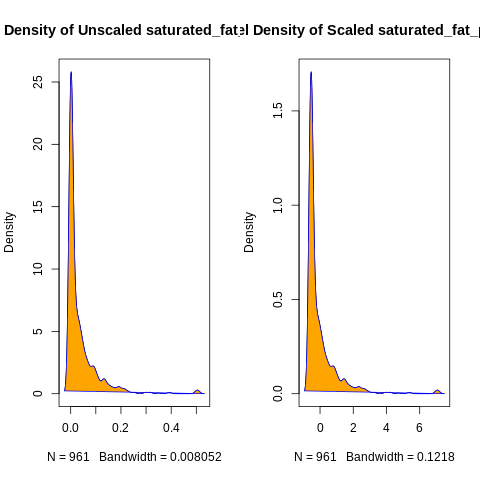

In [51]:
#density plot for saturated_ fat_ per_gram
%%R
par(mfrow=c(1, 2))
# Kernel Density Plot
d1 <- density(nutrition_subsetDF$saturated_fat_per_gram) 
# plots the results
plot(d1, main="Kernel Density of Unscaled saturated_fat_per_gram") 
# plots the results (filled)
polygon(d1, col="orange", border="blue")
# Kernel Density Plot
d2 <- density(nutrition_subsetDF$scaled_saturated_fat_per_gram) 
# plots the results
plot(d2, main="Kernel Density of Scaled saturated_fat_per_gram") 
# plots the results (filled)
polygon(d2, col="orange", border="blue") 

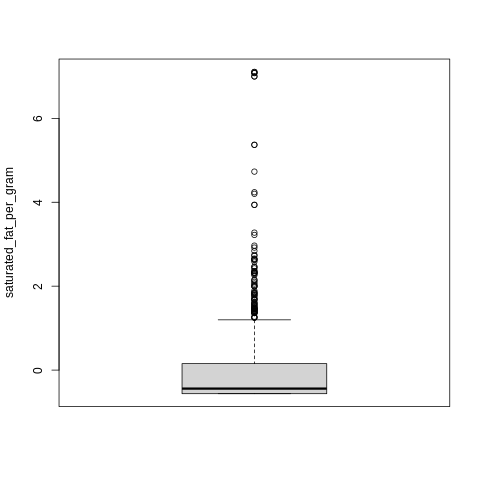

In [52]:
#barplot of saturated_ fat_ per_gram variable
%%R
boxplot(nutrition_subsetDF$scaled_saturated_fat_per_gram,
  ylab = "saturated_fat_per_gram"
)

Are there any missing values? If so, impute as necessary and explain your approach. 
* There are no missing values in saturated_fat_per_gram variable.

In [53]:
# Does $saturated_fat_per_gram have any missing values?
%%R
# is.na(nutrition_subsetDF$saturated_fat_per_gram) returns a vector, e.g., (F, F, F, T, F, ...)
sum(is.na(nutrition_subsetDF$saturated_fat_per_gram))


[1] 0


Standardize (zero mean) the weight_in_grams variable, and determine if there are any outliers. 
*  From the three sigma rule for weight_in_grams variable there are 22 outliers.
*   From the box plot below all the values above 514 are outliers for the weight_in_grams variable.

In [54]:
#Standardize (zero mean) the weight_in_grams variable
%%R
nutrition_subsetDF$scaled_weight_in_grams <- scale(x = nutrition_subsetDF$weight_in_grams)
summary(nutrition_subsetDF$scaled_weight_in_grams)

       V1         
 Min.   :-0.8471  
 1st Qu.:-0.6674  
 Median :-0.2070  
 Mean   : 0.0000  
 3rd Qu.: 0.3899  
 Max.   : 7.9165  


In [55]:
# three sigma rule for weight_in_grams variable.
%%R
three_sigma_rule <- (nutrition_subsetDF$scaled_weight_in_grams < -3 | 
                     nutrition_subsetDF$scaled_weight_in_grams > 3 )
# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")
# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 
# The which() command returns the row indices of all such records. 
cat("The scaled weight_in_grams values that are outliers: \n\n")
nutrition_subsetDF$scaled_weight_in_grams[which(three_sigma_rule)]
cat("\n\nThe scaled weight_in_grams values that are NOT outliers: \n\n")
nutrition_subsetDF$scaled_weight_in_grams[which(!three_sigma_rule)]

There are 22 outliers 

The scaled weight_in_grams values that are outliers: 



The scaled weight_in_grams values that are NOT outliers: 

  [1] -0.809561060 -0.688191734 -0.809561060 -0.688191734 -0.280879688
  [6] -0.820930552 -0.803876314 -0.576486477 -0.366150877 -0.462791558
 [11] -0.332042402 -0.167184770 -0.440052574 -0.468476304 -0.405944099
 [16] -0.440052574 -0.491215288 -0.292249180 -0.741344109 -0.360466131
 [21] -0.758398347 -0.496900034 -0.440052574 -0.485530542 -0.366150877
 [26] -0.366150877 -0.366150877 -0.422998337 -0.053489851 -0.468476304
 [31] -0.366150877 -0.366150877 -0.366150877 -0.688191734 -0.688191734
 [36] -0.688191734 -0.688191734 -0.445737320 -0.502584780 -0.440052574
 [41] -0.354781385 -0.394574607 -0.434367828 -0.599225461 -0.053489851
 [46] -0.366150877 -0.366150877 -0.366150877 -0.366150877 -0.366150877
 [51] -0.366150877 -0.025066121 -0.025066121 -0.570801731 -0.525323763
 [56] -0.366150877 -0.366150877 -0.366150877 -0.735659363 -0.803876314
 [61] -0

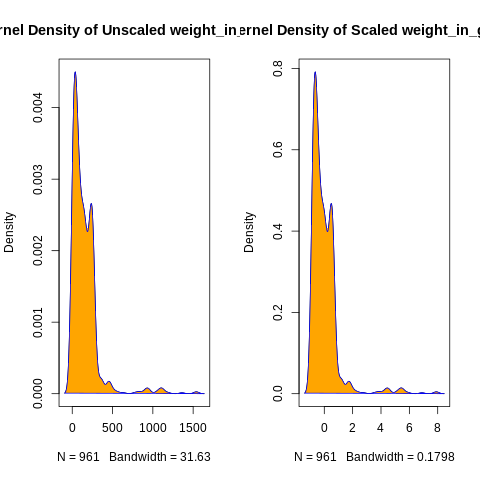

In [56]:
#density plot for weight_in_grams
%%R
par(mfrow=c(1, 2))
# Kernel Density Plot
d1 <- density(nutrition_subsetDF$weight_in_grams) 
# plots the results
plot(d1, main="Kernel Density of Unscaled weight_in_grams") 
# plots the results (filled)
polygon(d1, col="orange", border="blue")
# Kernel Density Plot
d2 <- density(nutrition_subsetDF$scaled_weight_in_grams) 
# plots the results
plot(d2, main="Kernel Density of Scaled weight_in_grams") 
# plots the results (filled)
polygon(d2, col="orange", border="blue") 

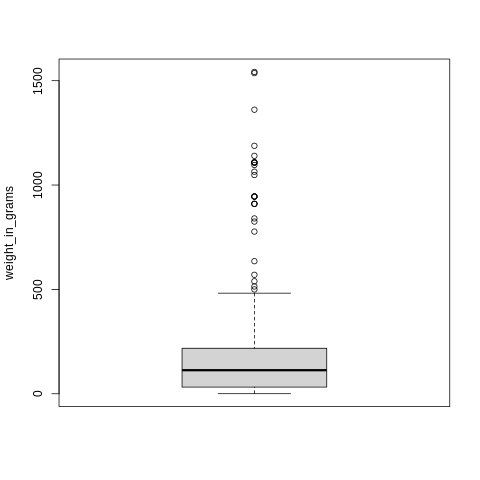

In [57]:
#barplot of saturated_ fat_ per_gram variable
%%R
boxplot(nutrition_subsetDF$weight_in_grams,
  ylab = "weight_in_grams"
)

Standardize (zero mean) the saturated_fat variable, and determine if there are any outliers. 
*  From the three sigma rule for saturated_fat variable there are 20 outliers.
*   From the box plot below all the values above 8.3 are outliers for the saturated_fat variable.

In [58]:
#Standardize (zero mean) the saturated_fat variable
%%R
nutrition_subsetDF$scaled_saturated_fat <- scale(x = nutrition_subsetDF$saturated_fat)
summary(nutrition_subsetDF$scaled_saturated_fat)

       V1         
 Min.   :-0.3711  
 1st Qu.:-0.3711  
 Median :-0.3339  
 Mean   : 0.0000  
 3rd Qu.:-0.0640  
 Max.   :10.7882  


In [59]:
# three sigma rule for saturated_fat variable.
%%R
three_sigma_rule <- (nutrition_subsetDF$scaled_saturated_fat < -3 | 
                     nutrition_subsetDF$scaled_saturated_fat > 3 )
# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")
# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 
# The which() command returns the row indices of all such records. 
cat("The scaled saturated_fat values that are outliers: \n\n")
nutrition_subsetDF$scaled_saturated_fat[which(three_sigma_rule)]
cat("\n\nThe scaled saturated_fat values that are NOT outliers: \n\n")
nutrition_subsetDF$scaled_saturated_fat[which(!three_sigma_rule)]

There are 20 outliers 

The scaled saturated_fat values that are outliers: 



The scaled saturated_fat values that are NOT outliers: 

  [1] -0.371135870 -0.296678195 -0.371135870  0.131453437  1.406541123
  [6] -0.278063776 -0.371135870 -0.101226798 -0.343214242 -0.343214242
 [11] -0.333907032  0.029074134 -0.203606101 -0.110534007 -0.119841216
 [16] -0.129148426  0.271061578 -0.147762845 -0.063997960 -0.287370985
 [21] -0.240834938 -0.008154704 -0.129148426 -0.129148426  0.075610181
 [26] -0.240834938 -0.287370985 -0.194298891 -0.157070054 -0.026769123
 [31] -0.259449357 -0.175684473 -0.240834938 -0.194298891 -0.194298891
 [36] -0.082612379  0.094224600 -0.054690751 -0.036076332 -0.119841216
 [41]  0.280368787  0.308290415 -0.147762845 -0.305985404 -0.129148426
 [46] -0.138455635  0.224525531  0.084917390  0.364133672  0.010459715
 [51]  0.187296693  0.550277859  0.550277859 -0.203606101 -0.073305169
 [56]  0.019766924  0.634042744  0.150067856 -0.333907032 -0.315292614
 [61] -0.147

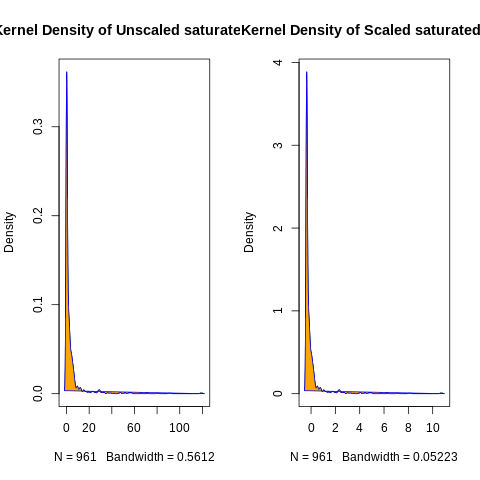

In [60]:
#density plot for saturated_fat
%%R
par(mfrow=c(1, 2))
# Kernel Density Plot
d1 <- density(nutrition_subsetDF$saturated_fat) 
# plots the results
plot(d1, main="Kernel Density of Unscaled saturated_fat") 
# plots the results (filled)
polygon(d1, col="orange", border="blue")
# Kernel Density Plot
d2 <- density(nutrition_subsetDF$scaled_saturated_fat) 
# plots the results
plot(d2, main="Kernel Density of Scaled saturated_fat") 
# plots the results (filled)
polygon(d2, col="orange", border="blue") 

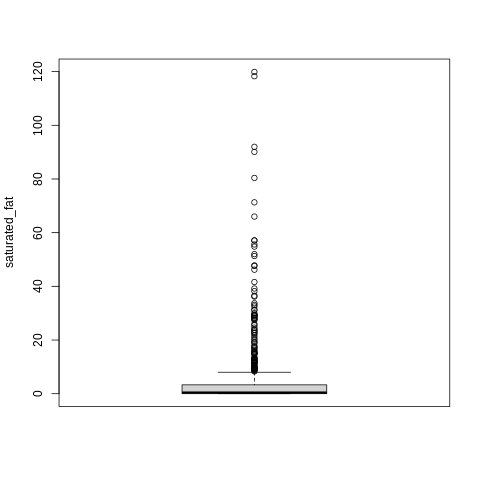

In [61]:
#barplot of saturated_fat variable
%%R
boxplot(nutrition_subsetDF$saturated_fat,
  ylab = "saturated_fat"
)

Standardize (zero mean) the cholesterol, and determine if there are any outliers. 
*  From the three sigma rule for cholesterol variable there are 17 outliers.
*   From the box plot below all the values above 51 are outliers for the cholesterol variable.

In [62]:
#Standardize (zero mean) the cholesterol variable
%%R
nutrition_subsetDF$scaled_cholesterol <- scale(x = nutrition_subsetDF$cholesterol)
summary(nutrition_subsetDF$scaled_cholesterol)

       V1         
 Min.   :-0.2714  
 1st Qu.:-0.2714  
 Median :-0.2714  
 Mean   : 0.0000  
 3rd Qu.:-0.1046  
 Max.   :16.8426  


In [63]:
# three sigma rule for cholesterol variable.
%%R
three_sigma_rule <- (nutrition_subsetDF$scaled_cholesterol < -3 | 
                     nutrition_subsetDF$scaled_cholesterol > 3 )
# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")
# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 
# The which() command returns the row indices of all such records. 
cat("The scaled cholesterol values that are outliers: \n\n")
nutrition_subsetDF$scaled_cholesterol[which(three_sigma_rule)]
cat("\n\nThe scaled cholesterol values that are NOT outliers: \n\n")
nutrition_subsetDF$scaled_cholesterol[which(!three_sigma_rule)]

There are 17 outliers 

The scaled cholesterol values that are outliers: 



The scaled cholesterol values that are NOT outliers: 

  [1] -0.271369038 -0.271369038 -0.271369038 -0.087975476  0.387180572
  [6] -0.238024754 -0.271369038  0.220459152  0.128762371 -0.171336186
 [11] -0.129655831  0.420524856  0.112090229  0.362172359  0.353836288
 [16]  0.320492004  0.370508430  0.453869140 -0.137991902  0.337164146
 [21] -0.271369038  0.278811649  0.262139507  0.228795223  0.403852714
 [26]  0.270475578  0.220459152  0.162106655  0.612254490  0.328828075
 [31]  1.095746609  0.328828075  0.187114868 -0.271369038 -0.271369038
 [36] -0.146327973 -0.054631192  0.195450939  0.137098442  0.295483791
 [41]  0.428860927  0.378844501  0.270475578  0.070409874  0.695615200
 [46]  0.370508430  0.245467365  0.503885567  0.445533069  0.637262703
 [51] -0.271369038 -0.271369038  0.095418087  0.145434513  0.395516643
 [56]  0.453869140  0.378844501  0.778975910 -0.271369038 -0.137991902
 [61]  0.7206234

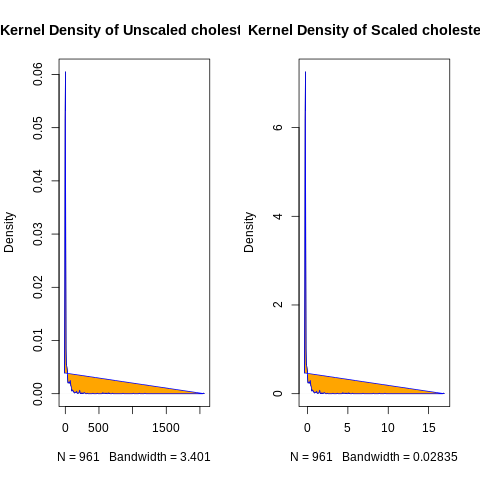

In [64]:
#density plot for cholesterol
%%R
par(mfrow=c(1, 2))
# Kernel Density Plot
d1 <- density(nutrition_subsetDF$cholesterol) 
# plots the results
plot(d1, main="Kernel Density of Unscaled cholesterol") 
# plots the results (filled)
polygon(d1, col="orange", border="blue")
# Kernel Density Plot
d2 <- density(nutrition_subsetDF$scaled_cholesterol) 
# plots the results
plot(d2, main="Kernel Density of Scaled cholesterol") 
# plots the results (filled)
polygon(d2, col="orange", border="blue") 

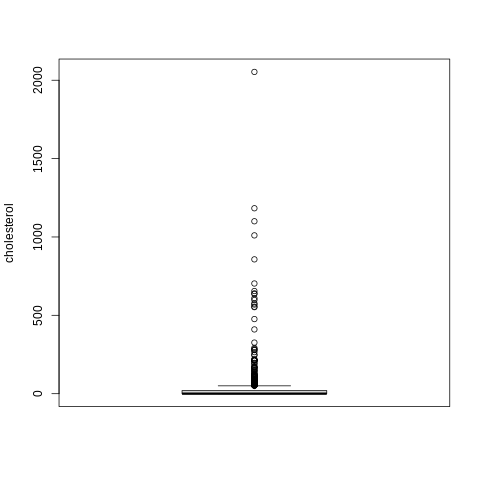

In [65]:
#barplot of cholesterol variable
%%R
boxplot(nutrition_subsetDF$cholesterol,
  ylab = "cholesterol"
)